# Experiment 2
#### 6/1/23 
In this experiment, we tried to remedy the previous experiment's flaws by calculating inductance over a closer gap distance (as opposed to Exp 1's ~17.5 mm).
Keeping the commanded current at 6 amps, we went from a gap distance of 2.5 mm to 7.5 mm, increasing by 0.5 mm increments.

Trials:

11 x {6 A}

In [11]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint as pprint

In [12]:
threshold = 0.012
def parse_file(string):
    with open(string, newline='') as csvfile:
        file = csv.reader(csvfile, delimiter=' ', quotechar='|')
        dataTitles = []
        for row in file: dataTitles += [row]

    data = dataTitles[16:] # ['1232,2234']
    
    # convert array of strings to floats
    results = []
    for string in data[:-1]:
        friend = string[0]
        arr = friend.split(',')
        for i in range(len(arr)):
            arr[i] = float(arr[i])
        results += [arr]
        
    # extract time and current
    times = []
    current = []
    for index in range(len(results)): 
        times += [results[index][0]]
        current += [results[index][1]]

    # len(times) should equal len(current)
    
    # subtract out average of first 1000 indices
    cutoff = 2000
    av = np.average(current[0:cutoff])
    for x in range(cutoff): current[x] -= av
    
    # PEAK DETECTION  
    count = 1 # start from 1 so you can access index after peak starts
    for index in range(len(current)):
        if current[index] > threshold: 
            # this is a peak, therefore this is where the array should start
            break
        count += 1
    
    interval = 10000 #go from count to 7500 indices after
    
    return times[count:count +interval], current[count:count +interval]

# Exp 2a, 2b: Data structure setup
Commanded battery voltage as keys; file names as entries corresponding to commanded battery voltage.

Commanded battery voltage computed as: requested Teensy current (0.5, 1.5, 2.5, 3.5, 6 amps) * resistance (1.6 ohms).

In [104]:
# EXPERIMENT 2a - implant collision with magnet at 6 mm, so only graph from 2.5 to 5.5 mm gap distance
m_2_5 = {
    9.6: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2a/TEK00000.CSV']
}

m_3 = {
    9.6: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2a/TEK00001.CSV']
}

m_3_5 = {
    9.6: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2a/TEK00002.CSV']
}

m_4 = {
    9.6: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2a/TEK00003.CSV']
}

m_4_5 = {
    9.6: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2a/TEK00004.CSV']
}

m_5 = {
    9.6: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2a/TEK00005.CSV']
}

m_5_5 = {
    9.6: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2a/TEK00006.CSV']
}

m_6 = {
    9.6: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2a/TEK00007.CSV']
}

all_trials = [m_2_5, m_3, m_3_5, m_4, m_4_5, m_5, m_5_5, m_6]

numTrials = len(m_2_5[9.6])

In [105]:
# EXPERIMENT 2b - larger gap distance, clamped test bench down, delivered 4 amps to limit test bench flex
# Files named by their ground truth gap distance (i.e, 4 amps at 3 mm)
# 4 amps * 1.6 ohms = 6.4 volts
m_3 = {
    6.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2b/TEK00000.CSV']
}

m_5 = {
    6.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2b/TEK00001.CSV']
}

m_7 = {
    6.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2b/TEK00002.CSV']
}

m_9 = {
    6.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2b/TEK00003.CSV']
}

m_11 = {
    6.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2b/TEK00004.CSV']
}

m_13 = {
    6.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2b/TEK00005.CSV']
}

m_15 = {
    6.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2b/TEK00006.CSV']
}

m_17 = {
    6.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2b/TEK00007.CSV']
}

m_19 = {
    6.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2b/TEK00008.CSV']
}

m_21 = {
    6.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2b/TEK00009.CSV']
}

m_23 = {
    6.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2b/TEK00010.CSV']
}

m_25 = {
    6.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2b/TEK00011.CSV']
}

m_27 = {
    6.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2b/TEK00012.CSV']
}

m_29 = {
    6.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/6-1-23_Exp2/Exp2b/TEK00013.CSV']
}

all_trials_2b = [m_3,m_5,m_7,m_9,m_11,m_13,m_15,m_17,m_19,m_21,m_23,m_25,m_27,m_29]

numTrials_2b = len(m_29[6.4])

# Inductance calculations & plotting

In [106]:
# calculate inductance instantaneously, put into array, graph against time
res = 1.6
sampling_rate = 312000 # 312 kS/s on oscilloscope
file_colors = ['olivedrab','firebrick','mediumblue']
# moving_average = 2000

In [107]:
''' Plot inductance from no-implant test cases '''
# whatDistance = gap distance string, whatVoltage = voltage int
def inductances(distance_dict, whatDistance, whatVoltage):
    inductance_reads = {whatVoltage: []}
    time_reads = {whatVoltage: []}
    current_reads = {whatVoltage: []}
    single_inductance_reads = {whatVoltage: []}
    # moving_average = 3000

    for commanded_batt_v in distance_dict: # iterate through all amp trials (0.5, 1.5, 2.5, 3.5, 6)

        for i in range(numTrials): # three trials, three files

            inductance = []
            times, current = parse_file(distance_dict[commanded_batt_v][i])
            moving_average = np.argmax(current)

            # 0 out times array
            start = times[0]
            for ind in range(len(times)): times[ind] = times[ind] - start
            count = 0

            for index in range(len(current) - moving_average): #iterate through current from o-scope to calculate instantaneous inductance

                # NUMERATOR

                curr_av = 0 # average current from i ndex to index + moving_average
                for x in range(moving_average): curr_av += current[x]
                curr_av = curr_av / moving_average

                time_window = moving_average / sampling_rate

                voltage_integral = (40 - 1.6 * curr_av) * time_window

                # DENOMINATOR
                                            # left end of window
                i_t0 = current[index] * 7.5 # scaled by 7.5 per the datasheet from the ESCON Motor Driver

                i_t = current[index + moving_average] * 7.5 #right end of window

                curr_diff = i_t - i_t0 

                # NUM/DENOM

                if curr_diff < 1e-8:
                    curr_inductance = np.nan
                else: 
                    curr_inductance = voltage_integral / curr_diff

                # curr_inductance = voltage_integral / (curr_current_diff + 0.00000000001) #to avoid div by 0... kinda jank though
                inductance += [curr_inductance]

                if count == 0: 
                    single_inductance_reads[commanded_batt_v] += [curr_inductance]
                    count = 1

            inductance += [0]*moving_average

            # save inductance for error calculations
            inductance_reads[commanded_batt_v] += [inductance]
            time_reads[commanded_batt_v] += [times]
            current_reads[commanded_batt_v] += [current]

            for index in range(len(inductance)): inductance[index] = inductance[index] * 1
            plt.figure(commanded_batt_v) # split it up by commanded battery voltage
            plt.plot(times,inductance, 'r', linewidth = 0.6)
            plt.plot(times,current, 'b', linewidth = 0.6)
            plt.ylim(0,3.5)
            plt.xlabel('Time')
            plt.ylabel('H, Amps')
            plt.title(whatDistance + ': inductance, current transient at ' + str(commanded_batt_v) + ' V/' + str(round(commanded_batt_v/res,1)) + ' A')
            
    return inductance_reads, time_reads, current_reads, single_inductance_reads

#### Exp 2a data analysis

<Figure size 640x480 with 0 Axes>

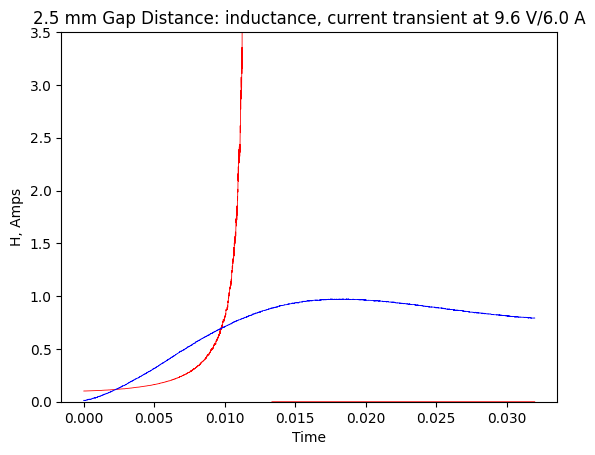

<Figure size 640x480 with 0 Axes>

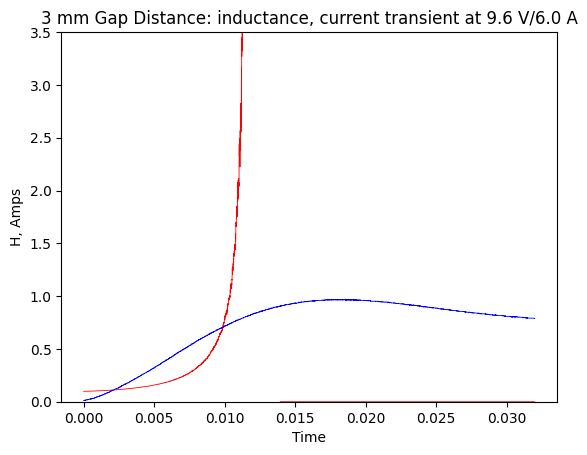

<Figure size 640x480 with 0 Axes>

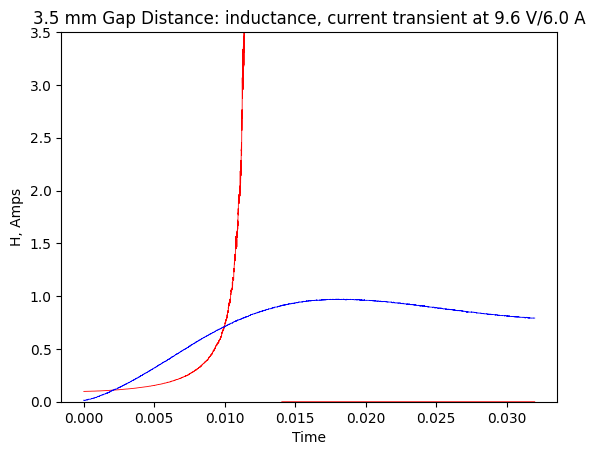

<Figure size 640x480 with 0 Axes>

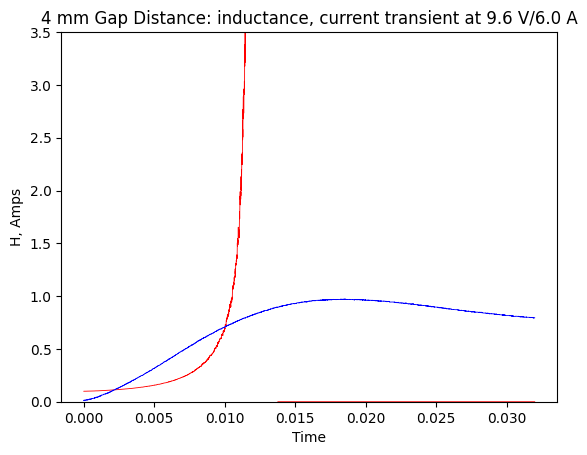

<Figure size 640x480 with 0 Axes>

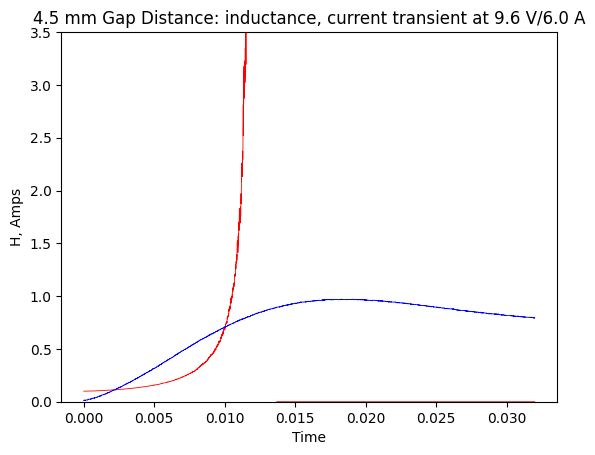

<Figure size 640x480 with 0 Axes>

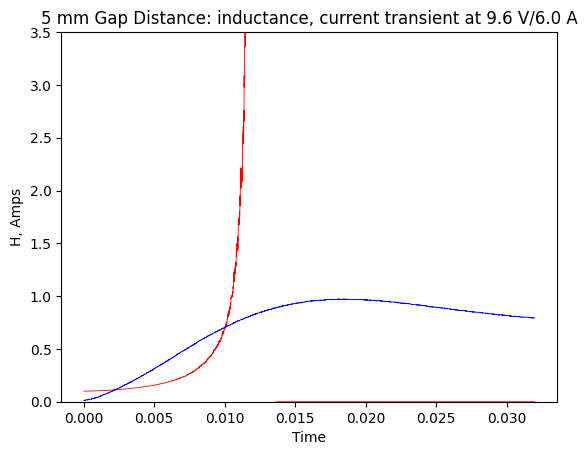

<Figure size 640x480 with 0 Axes>

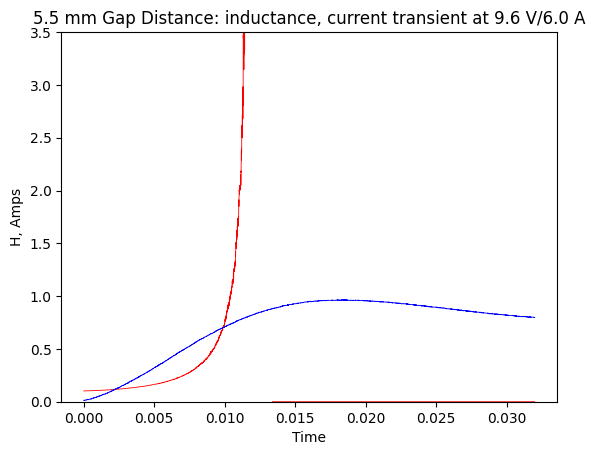

<Figure size 640x480 with 0 Axes>

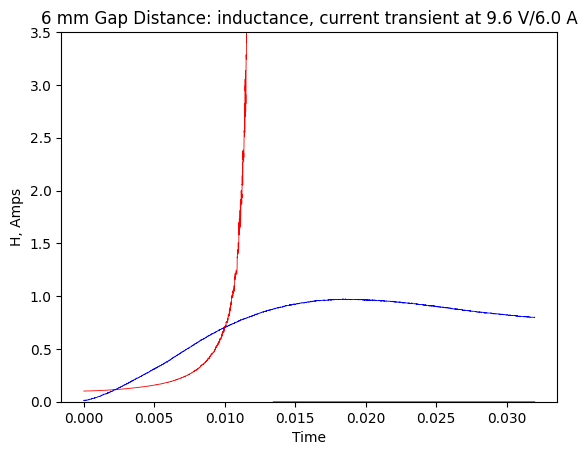

In [85]:
titles = ['2.5 mm Gap Distance',
          '3 mm Gap Distance',
          '3.5 mm Gap Distance',
          '4 mm Gap Distance',
          '4.5 mm Gap Distance',
          '5 mm Gap Distance',
          '5.5 mm Gap Distance',
          '6 mm Gap Distance']
          
colors = ['r',
          'g',
          'b',
          'k',
          'lightblue',
          'olivedrab',
          'firebrick',
          'mediumblue']

inductance_reads_all_trials = []
time_reads_all_trials = []
current_reads_all_trials = []
single_inductance_reads_all_trials = []

for trial in range(len(all_trials)): # all_trials[trial] is a dictionary, like m_2_5   
    
    plt.figure(trial)
    
    inductance_reads, time_reads, current_reads, single_inductance_reads = inductances(all_trials[trial], titles[trial])
    
    inductance_reads_all_trials += [inductance_reads]
    time_reads_all_trials += [time_reads]
    current_reads_all_trials += [current_reads]
    single_inductance_reads_all_trials += [single_inductance_reads]
    
    # plt.ylim(0,0.15)
    # plt.xlim(0, 1)
    plt.show()

## Inductance Error Plots
Format: 

Inductance_with = {0.8: [ [1] [2] [3] ], 2.4: [], 4: [], 5.6: [], 9.6: []}, where 1,2,3 are for the trials 1, 2, and 3.

#### Single inductance calculations

In [86]:
print("Calculating inductance once, from index 0 to index of maximum for each current transient:" + "\n")
pprint.pprint(single_inductance_reads_all_trials)

Calculating inductance once, from index 0 to index of maximum for each current transient:

[{9.6: [0.10122818612240178]},
 {9.6: [0.09849095886503798]},
 {9.6: [0.09774651167505677]},
 {9.6: [0.09908479151730167]},
 {9.6: [0.0994305040087917]},
 {9.6: [0.09948701084385529]},
 {9.6: [0.10194175504060894]},
 {9.6: [0.10062301509054901]}]


The above values are all very similar, even though I moved the implant from 2.5 to 6 mm with 0.5 mm increments. The inductance is not showing any change from 2.5 to 6 mm of gap distance.
Either this is because of the implant being attracted to the magnet and overcoming the distance I moved it, there's something wrong with my code/processing, or a gap distance of 2.5-7.5 mm is not large enough to see a change. I doubt it's the last one because Kamf, Abrahamsson et.al showed a change while moving continuously over 0 to 7.5 mm. 

# Exp 2b: Data structure setup
Commanded battery voltage as keys; file names as entries corresponding to commanded battery voltage.

#### Exp 2b data analysis

{6.4: [0.1532038592931541]}


<Figure size 640x480 with 0 Axes>

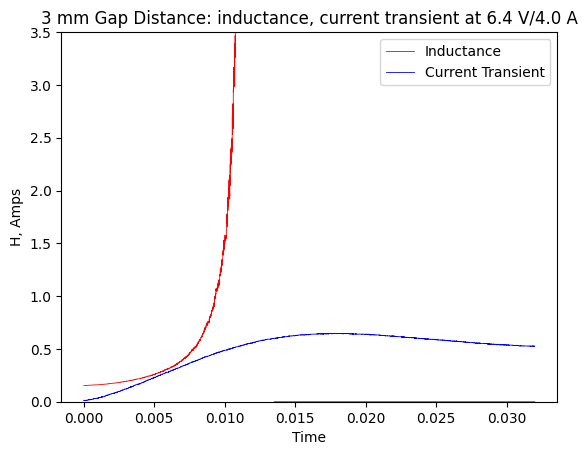

{6.4: [0.14700809647947125]}


<Figure size 640x480 with 0 Axes>

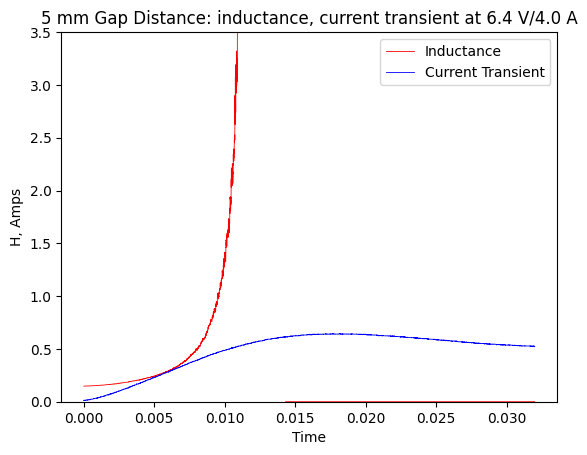

{6.4: [0.14858695801859992]}


<Figure size 640x480 with 0 Axes>

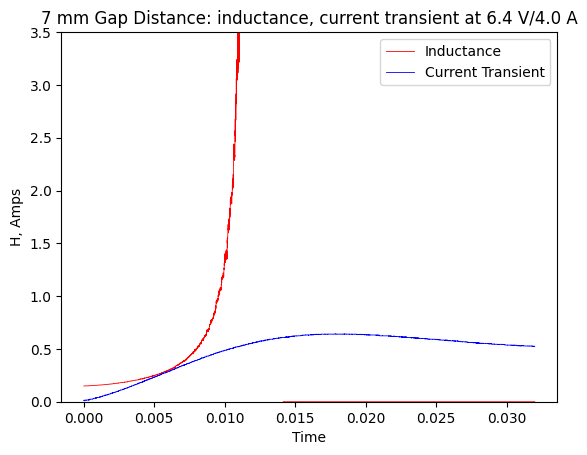

{6.4: [0.15181102545132036]}


<Figure size 640x480 with 0 Axes>

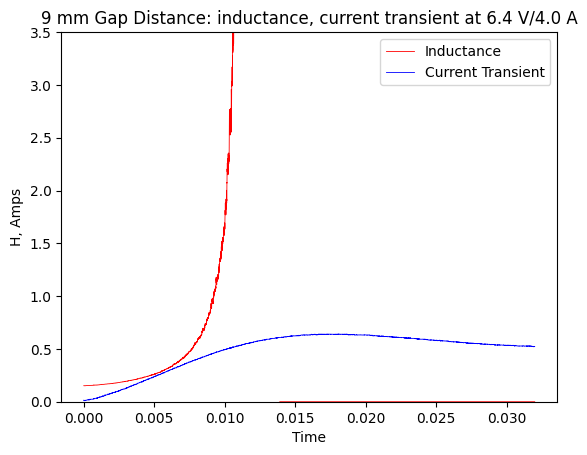

{6.4: [0.14468947038938212]}


<Figure size 640x480 with 0 Axes>

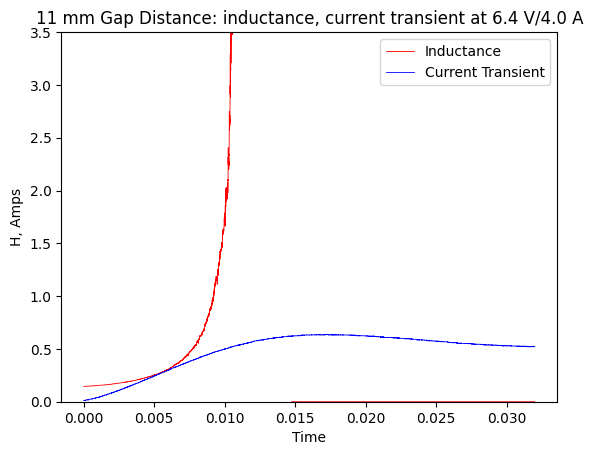

{6.4: [0.14552194555762096]}


<Figure size 640x480 with 0 Axes>

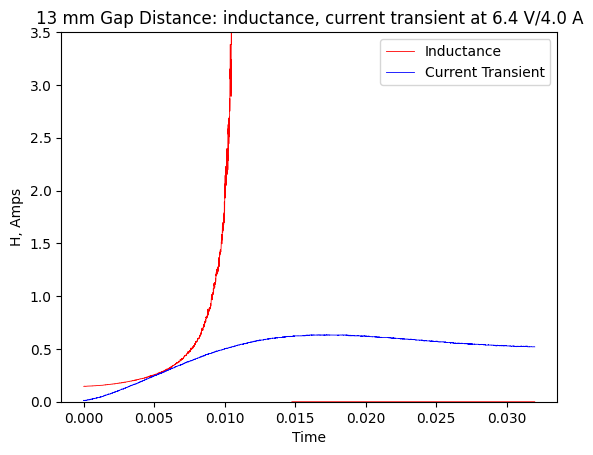

{6.4: [0.14757151315284428]}


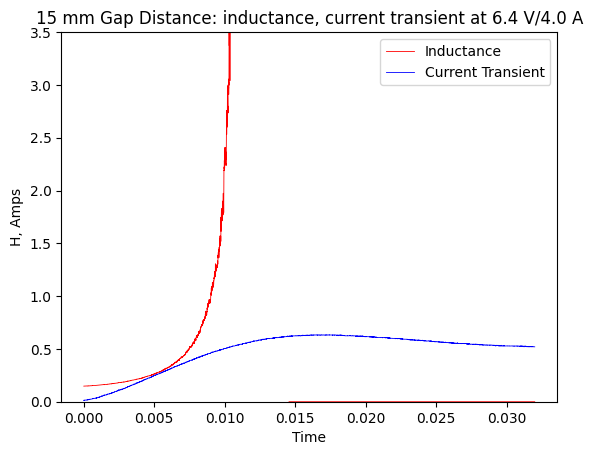

{6.4: [0.14461687988256236]}


<Figure size 640x480 with 0 Axes>

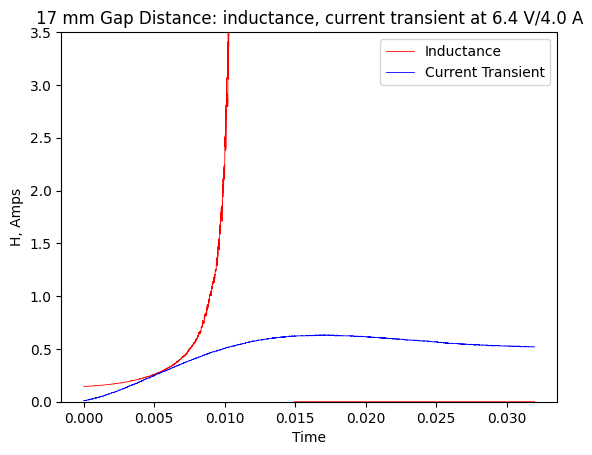

{6.4: [0.1421588389168118]}


<Figure size 640x480 with 0 Axes>

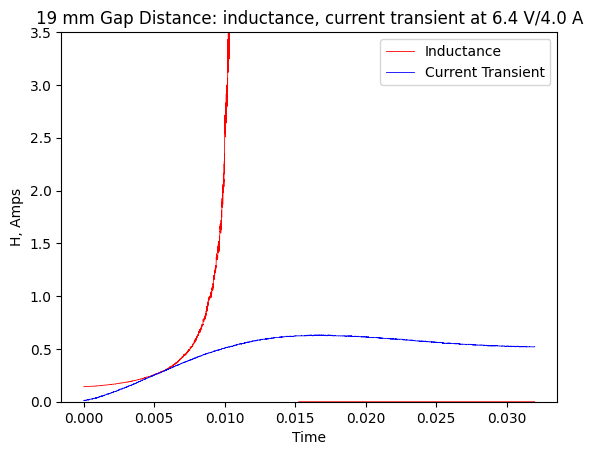

{6.4: [0.14044871423720845]}


<Figure size 640x480 with 0 Axes>

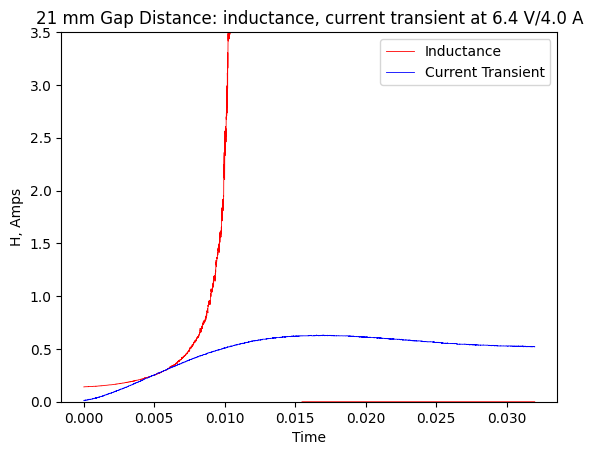

{6.4: [0.13943907660732663]}


<Figure size 640x480 with 0 Axes>

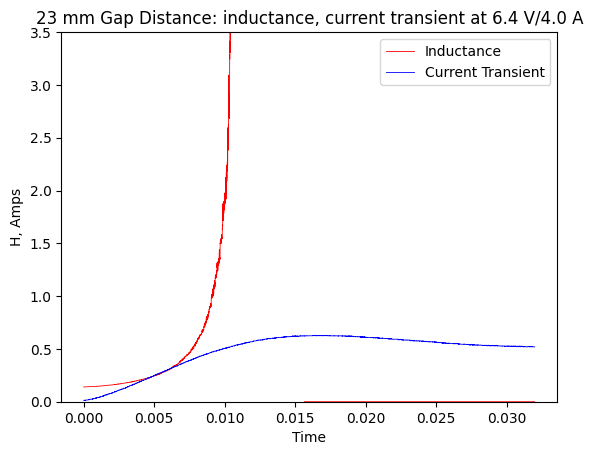

{6.4: [0.1407193424476278]}


<Figure size 640x480 with 0 Axes>

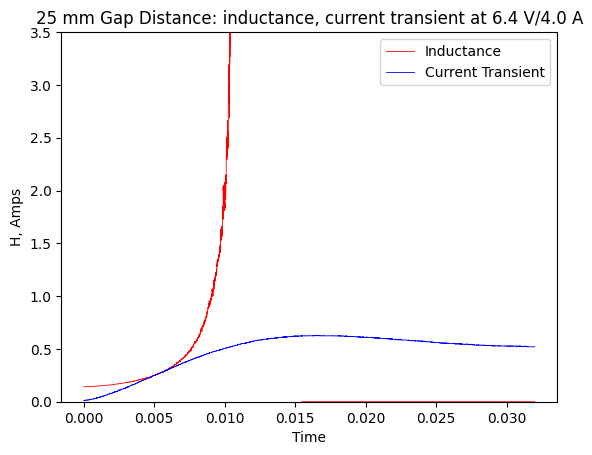

{6.4: [0.1464980429059193]}


<Figure size 640x480 with 0 Axes>

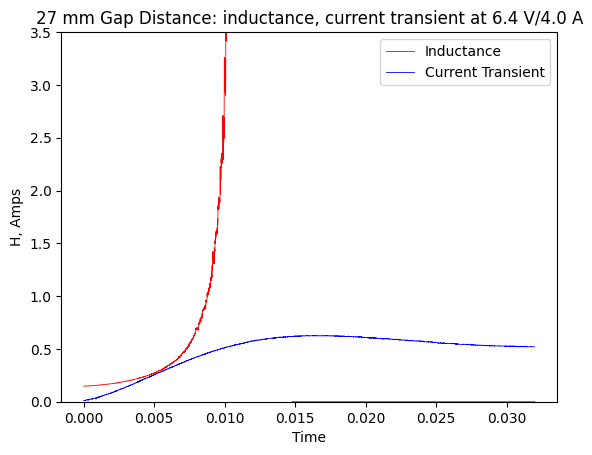

{6.4: [0.14350578931011843]}


<Figure size 640x480 with 0 Axes>

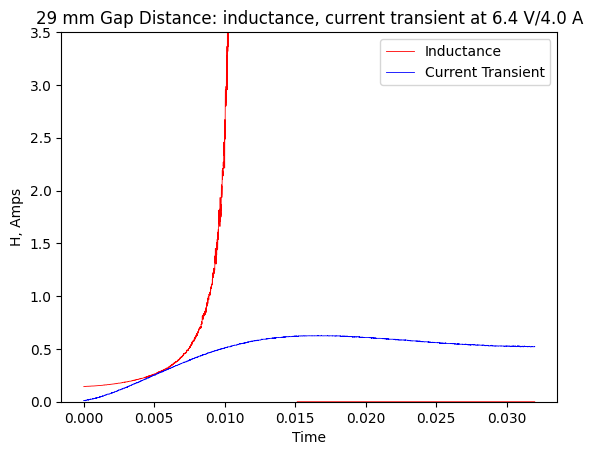

In [142]:
titles_2b = ['3 mm Gap Distance',
          '5 mm Gap Distance',
          '7 mm Gap Distance',
          '9 mm Gap Distance',
          '11 mm Gap Distance',
          '13 mm Gap Distance',
          '15 mm Gap Distance',
          '17 mm Gap Distance',
          '19 mm Gap Distance',
          '21 mm Gap Distance',
          '23 mm Gap Distance',
          '25 mm Gap Distance',
          '27 mm Gap Distance',
          '29 mm Gap Distance']

inductance_reads_all_trials = []
time_reads_all_trials = []
current_reads_all_trials = []
single_inductance_reads_all_trials = []

for trial in range(len(all_trials_2b)): # all_trials[trial] is a dictionary, like m_2_5   
    
    plt.figure(trial)
    
    inductance_reads, time_reads, current_reads, single_inductance_reads = inductances(all_trials_2b[trial], titles_2b[trial], 6.4)
    
    inductance_reads_all_trials += [inductance_reads]
    time_reads_all_trials += [time_reads]
    current_reads_all_trials += [current_reads]
    print(single_inductance_reads)
    single_inductance_reads_all_trials += [single_inductance_reads]
    
    # plt.ylim(0,0.15)
    # plt.xlim(0, 1)
    plt.legend(['Inductance','Current Transient'])
    plt.show()

#### Single Inductance Calculations

In [109]:
print("Calculating inductance once, from index 0 to index of maximum for each current transient:" + "\n")
for i in range(len(single_inductance_reads_all_trials)):
    print("Inductance [H] for " + titles_2b[i])
    print(single_inductance_reads_all_trials[i])
    print("\n")

Calculating inductance once, from index 0 to index of maximum for each current transient:

Inductance [H] for 3 mm Gap Distance
{6.4: [0.1532038592931541]}


Inductance [H] for 5 mm Gap Distance
{6.4: [0.14700809647947125]}


Inductance [H] for 7 mm Gap Distance
{6.4: [0.14858695801859992]}


Inductance [H] for 9 mm Gap Distance
{6.4: [0.15181102545132036]}


Inductance [H] for 11 mm Gap Distance
{6.4: [0.14468947038938212]}


Inductance [H] for 13 mm Gap Distance
{6.4: [0.14552194555762096]}


Inductance [H] for 15 mm Gap Distance
{6.4: [0.14757151315284428]}


Inductance [H] for 17 mm Gap Distance
{6.4: [0.14461687988256236]}


Inductance [H] for 19 mm Gap Distance
{6.4: [0.1421588389168118]}


Inductance [H] for 21 mm Gap Distance
{6.4: [0.14044871423720845]}


Inductance [H] for 23 mm Gap Distance
{6.4: [0.13943907660732663]}


Inductance [H] for 25 mm Gap Distance
{6.4: [0.1407193424476278]}


Inductance [H] for 27 mm Gap Distance
{6.4: [0.1464980429059193]}


Inductance [H] for 2

plot inductance (y) vs gap dist (x)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


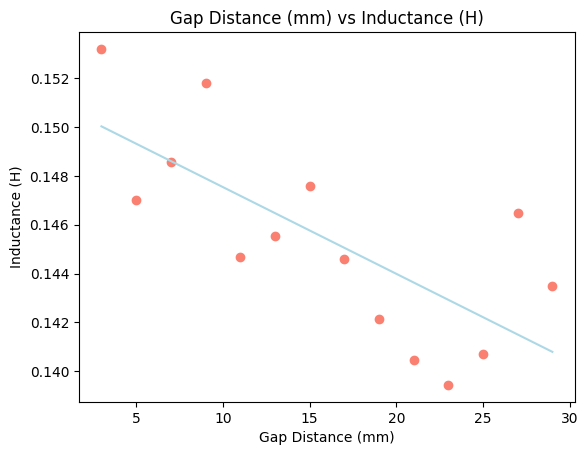

In [138]:
y = 3
gap_dist = []
for x in range(14): 
    gap_dist += [y]
    y += 2

single_arr = []
for p in range(14):
    single_arr += [single_inductance_reads_all_trials[p][6.4][0]]

plt.figure(1)
plt.scatter(gap_dist, single_arr, color = 'salmon')
a, b = np.polyfit(gap_dist, single_arr, 1)
x = np.array(gap_dist)
plt.plot(gap_dist, a*x+b, color = 'lightblue')
plt.title("Gap Distance (mm) vs Inductance (H)")
plt.xlabel("Gap Distance (mm)")
plt.ylabel("Inductance (H)")

print(gap_dist)

Part of this experiment consists of asking what our reasonable range of operation is. 
This data suggests we operate within 15-25 mm. It's noisy until then and after that. I'd also believe this, because the test bench displayed abnormal flex especially starting around 6 mm of gap distance, going until near 15 mm (I observed the lower limit more rigorously than the upper, though).

My proposed next steps: focus on half mm increments from 15 mm to 20 mm (+/- 3mm) of gap distance.